# Predict Party Affiliation of Congressmen

IMPORTING DIFFERENT LIBRARIES SUCH AS SEABORN ,NUMPY AND PANDAS WHICH WOULD HELP IN DATA ANALYSIS AND IMPORTING VARIOUS MODELS.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
vote=pd.read_csv('vote.csv')
vote.head(15)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,R,Y,Y,Y,N
1,CT,Nancy Johnson,R,Y,N,N,Y
2,AL,Robert Cramer,D,Y,Y,Y,Y
3,FL,Kendrick Meek,D,Y,N,N,N
4,MI,Peter Hoekstra,R,N,Y,Y,Y
5,NY,Louise Slaughter,D,N,N,N,Y
6,CA,David Dreier,R,N,Y,Y,N
7,VA,James Forbes,R,Y,Y,Y,Y
8,FL,Bill Young,R,Y,Y,Y,Y
9,ME,Michael Michaud,D,Y,Y,N,Y


In [3]:
vote_org=vote.copy()
vote_org

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,R,Y,Y,Y,N
1,CT,Nancy Johnson,R,Y,N,N,Y
2,AL,Robert Cramer,D,Y,Y,Y,Y
3,FL,Kendrick Meek,D,Y,N,N,N
4,MI,Peter Hoekstra,R,N,Y,Y,Y
...,...,...,...,...,...,...,...
429,WA,Jennifer Dunn,R,Y,Y,Y,N
430,TX,Raymond Green,D,Y,N,Y,Y
431,GA,Denis Majette,D,N,N,N,Y
432,FL,Clifford Stearns,R,Y,Y,Y,N


# EXPLAINATARY DATA ANALAYSIS (EDA)

As usual, before thinking about what supervised learning models to apply to this dataset, we need to perform exploratory data analysis (EDA) to understand the structure of the data. EDA normally consists of two parts: the numerical part and the graphical part

In [4]:
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   434 non-null    object
 1   Name    434 non-null    object
 2   Party   434 non-null    object
 3   Vote1   434 non-null    object
 4   Vote2   434 non-null    object
 5   Vote3   434 non-null    object
 6   Vote4   434 non-null    object
dtypes: object(7)
memory usage: 23.9+ KB


The dataset has 435 rows and 7 columns, where 16 of the latter are features or predictor variables and one is the target variable (i.e. the 'party' column). It does not seem to have any missing data, but it is worth confirming by looking at the first few rows of data.

In [5]:
vote = vote.rename(columns={'Party': 'Democratic'})
vote.head()

,State,Name,Democratic,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,R,Y,Y,Y,N
1,CT,Nancy Johnson,R,Y,N,N,Y
2,AL,Robert Cramer,D,Y,Y,Y,Y
3,FL,Kendrick Meek,D,Y,N,N,N
4,MI,Peter Hoekstra,R,N,Y,Y,Y


REPLACING VALUES OF DATASETS WHICH ARE GIVEN WITH YES OR NO TO 1 AND 0 TO GET MORE PRESSICED RESULT SCINCE EDA DOESNT WORKS ON STRING VALUES

In [6]:
vote['Democratic'].replace('D', 1, inplace = True)
vote['Democratic'].replace('R', 0, inplace = True)

In [7]:
vote.replace('Y', 1, inplace = True)
vote.replace('N', 0, inplace = True)
vote

,State,Name,Democratic,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,0,1,1,1,0
1,CT,Nancy Johnson,0,1,0,0,1
2,AL,Robert Cramer,1,1,1,1,1
3,FL,Kendrick Meek,1,1,0,0,0
4,MI,Peter Hoekstra,0,0,1,1,1
...,...,...,...,...,...,...,...
429,WA,Jennifer Dunn,0,1,1,1,0
430,TX,Raymond Green,1,1,0,1,1
431,GA,Denis Majette,1,0,0,0,1
432,FL,Clifford Stearns,0,1,1,1,0


In [8]:
vote.replace('-', np.nan, inplace=True)

#  Graphical exploratory data analysis

It is a good idea to visualize the voting behavior between the two parties on some major issues. 'vOTE1' and 'Vote2' will be explored.

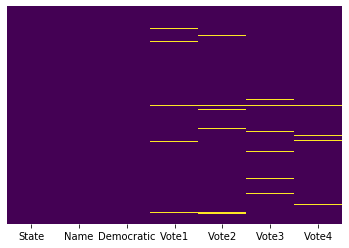

In [9]:
sns.heatmap(vote.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

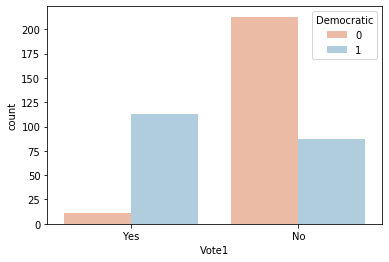

In [10]:
plt.figure()
sns.countplot(x='Vote1', hue='Democratic', data=vote, palette='RdBu')
#'RdBu' means 'Red' - Republican, and 'Blue' - Democrat.

# Label the ticks of x-axis
plt.xticks([0,1], ['Yes', 'No'])

# Show the plot
plt.show()

In [11]:
#No. of unique states
print(vote['State'].nunique())

50


In [12]:
vote[vote['Vote1'].isnull()]

,State,Name,Democratic,Vote1,Vote2,Vote3,Vote4
14,WA,Adam Smith,1,NaN,NaN,0.0,0.0
45,FL,Alcee Hastings,1,NaN,0.0,0.0,1.0
71,CA,Walter Herger,0,NaN,1.0,1.0,0.0
198,MO,Richard Gephardt,1,NaN,NaN,NaN,NaN
199,MI,John Conyers,1,NaN,0.0,0.0,1.0
229,IL,Dennis Hastert,0,NaN,1.0,1.0,0.0
270,FL,Robert Wexler,1,NaN,0.0,0.0,1.0
353,CT,John Larson,1,NaN,NaN,0.0,1.0
401,WI,Paul Ryan,0,NaN,NaN,1.0,1.0
412,OK,Brad Carson,1,NaN,NaN,1.0,0.0


In [13]:
vote['State'].unique()

array(['AK', 'CT', 'AL', 'FL', 'MI', 'NY', 'CA', 'VA', 'ME', 'AR', 'WA',
       'OH', 'IL', 'GA', 'ND', 'TX', 'IN', 'SC', 'MA', 'CO', 'HI', 'MD',
       'PA', 'MN', 'IA', 'NC', 'KY', 'WI', 'WV', 'NJ', 'AZ', 'OK', 'TN',
       'OR', 'SD', 'LA', 'MS', 'VT', 'KS', 'MT', 'NE', 'UT', 'MO', 'NM',
       'RI', 'ID', 'NV', 'WY', 'NH', 'DE'], dtype=object)

In [14]:
vote['State'].value_counts()

CA    53
TX    31
NY    29
FL    25
IL    19
PA    19
OH    18
MI    15
NJ    13
GA    13
NC    13
VA    11
MA    10
TN     9
IN     9
MO     9
WA     9
MD     8
MN     8
WI     8
AZ     8
CO     7
AL     7
LA     7
SC     6
KY     6
CT     5
OK     5
OR     5
IA     5
AR     4
MS     4
KS     4
NV     3
NE     3
WV     3
NM     3
UT     3
HI     2
ME     2
RI     2
ID     2
NH     2
AK     1
SD     1
DE     1
MT     1
ND     1
VT     1
WY     1
Name: State, dtype: int64

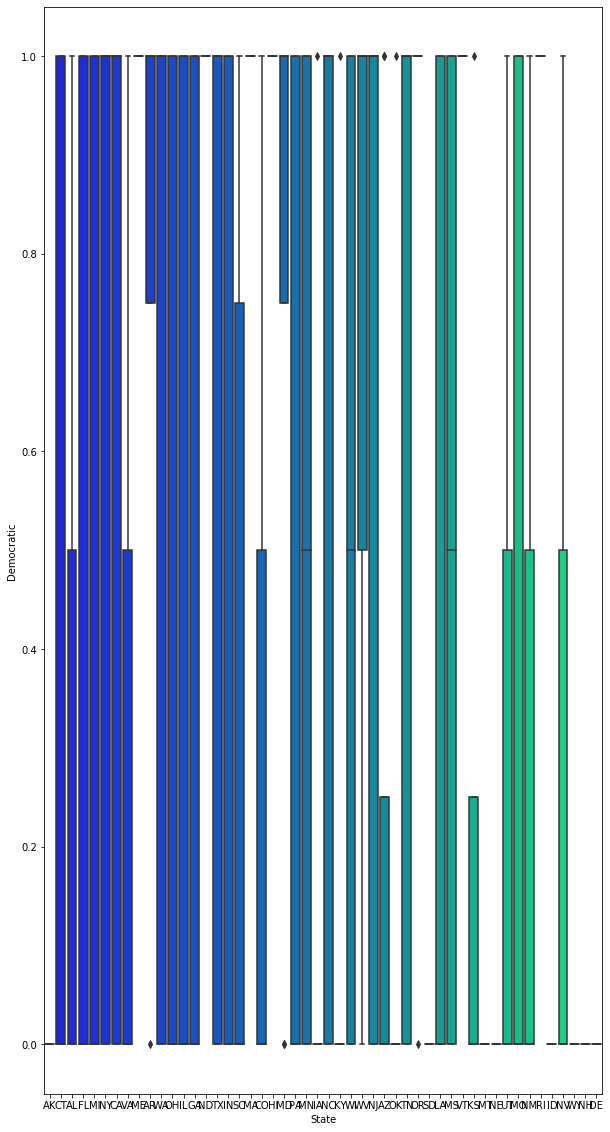

In [15]:
plt.figure(figsize=(10,20))
sns.boxplot(x='State',y='Democratic',data=vote,palette='winter');

# Preprocessing data

It was observed in EDA step that there are missing values in the data, encoded by '?'. One critical decision that comes to a data scientist's mind is whether to drop all missing data or impute it. This requires some exploration.

# Dropping missing data

How about dropping all missing data and then comparing the shape of the new DataFrame to that of the original DataFrame?

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


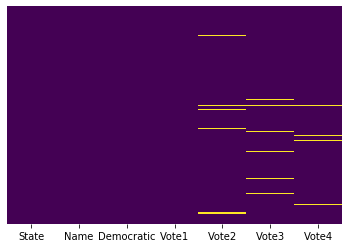

In [16]:
vote[(vote['Vote1'].isnull())&(vote['Democratic']==1)].fillna(value=1.0,inplace=True)
vote['Vote1'].fillna(value=0.0,inplace=True)
sns.heatmap(vote.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

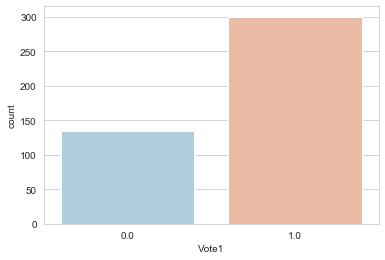

In [17]:
sns.set_style('whitegrid')   #Seeing how many yes and no are there in a particular bills  
sns.countplot(x='Vote1',data=vote,palette='RdBu_r');    # FOR VOTE1

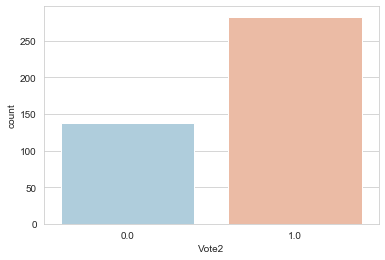

In [18]:
sns.set_style('whitegrid')       #FOR VOTE2
sns.countplot(x='Vote2',data=vote,palette='RdBu_r');

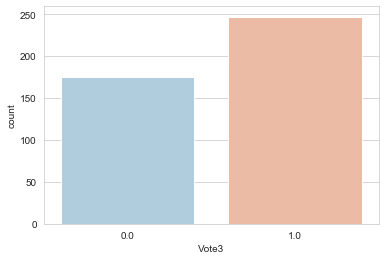

In [19]:
sns.set_style('whitegrid')     #FOR VOTE3
sns.countplot(x='Vote3',data=vote,palette='RdBu_r');

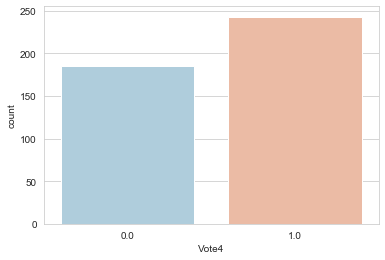

In [20]:
sns.set_style('whitegrid')#       FOR VOTE4
sns.countplot(x='Vote4',data=vote,palette='RdBu_r');

# FILLING THE UNDEFINED DATASETS AS PER VALUES OF STATES

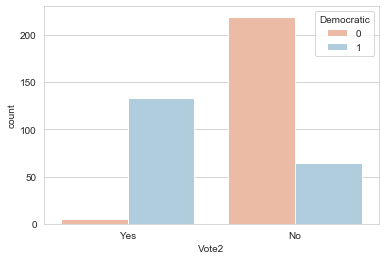

In [21]:
plt.figure()
sns.countplot(x='Vote2', hue='Democratic', data=vote, palette='RdBu')
plt.xticks([0,1], ['Yes', 'No'])
plt.show()

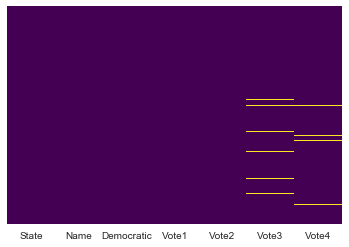

In [22]:
vote[(vote['Vote2'].isnull())&(vote['Democratic']==1)].fillna(value=1.0,inplace=True)
vote['Vote2'].fillna(value=0.0,inplace=True)
sns.heatmap(vote.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

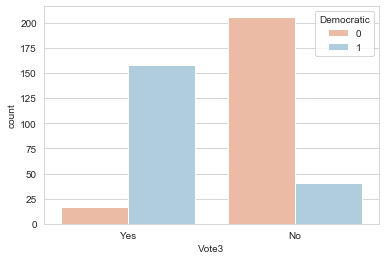

In [23]:
plt.figure()
sns.countplot(x='Vote3', hue='Democratic', data=vote, palette='RdBu')
plt.xticks([0,1], ['Yes', 'No'])
plt.show()

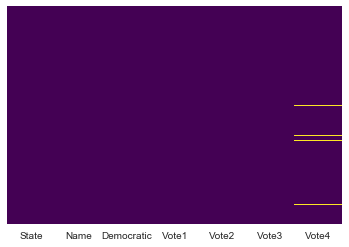

In [24]:
vote[(vote['Vote3'].isnull())&(vote['Democratic']==1)].fillna(value=1.0,inplace=True)
vote['Vote3'].fillna(value=0.0,inplace=True)
sns.heatmap(vote.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

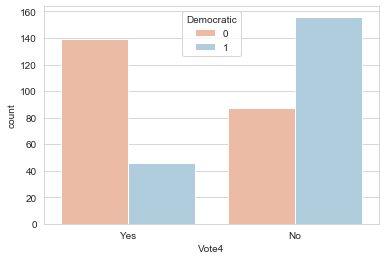

In [25]:
plt.figure()
sns.countplot(x='Vote4', hue='Democratic', data=vote, palette='RdBu')
plt.xticks([0,1], ['Yes', 'No'])
plt.show()

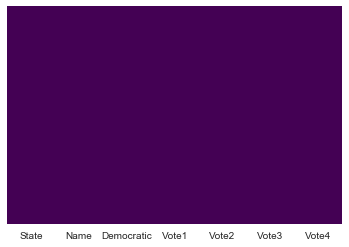

In [26]:
vote[(vote['Vote4'].isnull())&(vote['Democratic']==1)].fillna(value=0.0,inplace=True)
vote['Vote4'].fillna(value=1.0,inplace=True)
sns.heatmap(vote.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

here all datasets are cleaned without any NaN values and now we can proceed to the data analysis then creating models by applying different regressions and models

# Countplots Of the given dataset

Imporves the analysis of data and gives us more facts and figures by which means we can proceed up to the respective models.More it is a kind odf explaintory data analysis which gives us featured details about the bill which are passed via diffferent states of congress mens

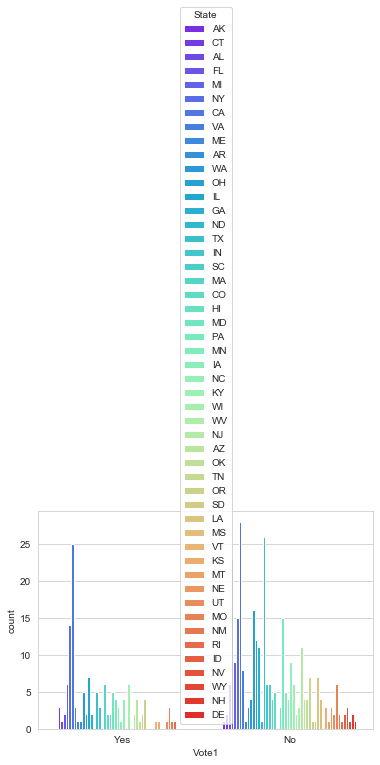

In [27]:
plt.figure()
sns.countplot(x='Vote1', hue='State', data=vote, palette='rainbow')
plt.xticks([0.0,1.0], ['Yes', 'No'])
plt.show()

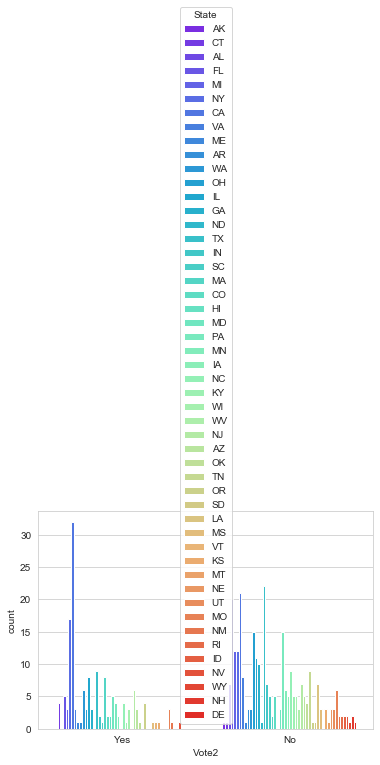

In [28]:
plt.figure()
sns.countplot(x='Vote2', hue='State', data=vote, palette='rainbow')
plt.xticks([0.0,1.0], ['Yes', 'No'])
plt.show()

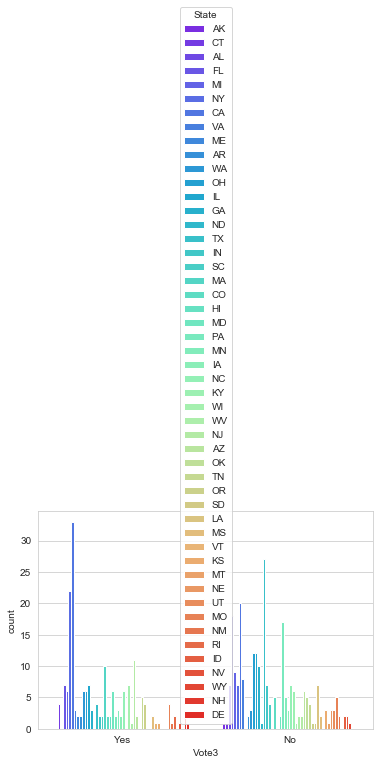

In [29]:
plt.figure()
sns.countplot(x='Vote3', hue='State', data=vote, palette='rainbow')
plt.xticks([0.0,1.0], ['Yes', 'No'])
plt.show()

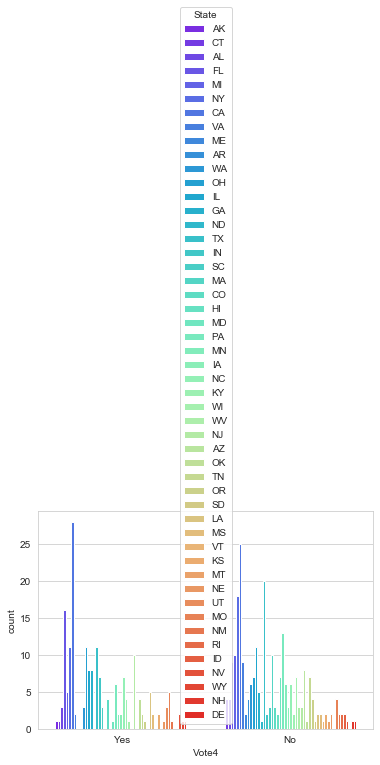

In [30]:
plt.figure()
sns.countplot(x='Vote4', hue='State', data=vote, palette='rainbow')
plt.xticks([0.0,1.0], ['Yes', 'No'])
plt.show()

TAKING THE GIVEN TEST SIZE AS GIVEN IN THE QUESTION

In [31]:
tsize=eval(input('Enter the test size ratio, it should not exceed 0.4 : '))
while tsize>0.4:
        tsize=eval(input('Enter the test size ratio, it should not exceed 0.4 : '))

Enter the test size ratio, it should not exceed 0.4 : 0.4


# Building the classification mode

In [32]:
from sklearn.model_selection import train_test_split
X=vote.drop(['Democratic','Name','State'],axis=1)
y=vote['Democratic']
print(type(X))
print(type(y))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=tsize,random_state=101)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [33]:
X

,Vote1,Vote2,Vote3,Vote4
0,1.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0
...,...,...,...,...
429,1.0,1.0,1.0,0.0
430,1.0,0.0,1.0,1.0
431,0.0,0.0,0.0,1.0
432,1.0,1.0,1.0,0.0


In [34]:
y

0      0
1      0
2      1
3      1
4      0
      ..
429    0
430    1
431    1
432    0
433    0
Name: Democratic, Length: 434, dtype: int64

# Naive Bayes Model

Having explored and preprocessed the dataset, it is time now to build the machine learning model, in this case, a classifier. GAUSSIAN NAIVE BAIS classifier will be used.

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

gnbModel = GaussianNB()
gnbModel.fit(X_train, y_train)

gnb_predictTestSet = gnbModel.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictTestSet)

print(confusion_matrix(y_test,gnb_predictTestSet))
print(classification_report(y_test,gnb_predictTestSet))
print("Accuracy over the Test Set (Naive Bayes): ", gnb_accuracy)

gnb_predictTrainSet = gnbModel.predict(X_train)
gnb_accuracy2 = accuracy_score(y_train, gnb_predictTrainSet)

print(confusion_matrix(y_train,gnb_predictTrainSet))
print(classification_report(y_train,gnb_predictTrainSet))
print("Accuracy over the Train Set (Naive Bayes): ", gnb_accuracy2)

[[82  8]
 [14 70]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        90
           1       0.90      0.83      0.86        84

    accuracy                           0.87       174
   macro avg       0.88      0.87      0.87       174
weighted avg       0.88      0.87      0.87       174

Accuracy over the Test Set (Naive Bayes):  0.8735632183908046
[[122  15]
 [ 16 107]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       137
           1       0.88      0.87      0.87       123

    accuracy                           0.88       260
   macro avg       0.88      0.88      0.88       260
weighted avg       0.88      0.88      0.88       260

Accuracy over the Train Set (Naive Bayes):  0.8807692307692307


In [36]:
x_new=np.array(vote.loc[429].drop(['Democratic','Name','State','Vote2','Vote3','Vote4'],axis=0))
x_new=x_new.transpose()
x_new=x_new.reshape(-1,1)

In [37]:
# Predict and print the label for the new data point X_new
new_prediction1 = gnbModel.predict(x_new)
print("Prediction: {}".format(new_prediction1))

Prediction: [0]


# KNN CLASSIFIER MODEL

Having explored and preprocessed the dataset, it is time now to build the machine learning model, in this case, a classifier. The k-Nearest Neighbors (k-NN) classifier will be used.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=1)
knnModel.fit(X_train,y_train)

knn_predictTestSet = knnModel.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictTestSet)
print(confusion_matrix(y_test,knn_predictTestSet))
print(classification_report(y_test,knn_predictTestSet))
print("Accuracy over the Test Set (KNN, k=1): ", knn_accuracy)

knn_predictTrainSet = knnModel.predict(X_train)
knn_accuracy2 = accuracy_score(y_train, knn_predictTrainSet)
print(confusion_matrix(y_train,knn_predictTrainSet))
print(classification_report(y_train,knn_predictTrainSet))
print("Accuracy over the Train Set (KNN, k=1): ", knn_accuracy2)

[[87  3]
 [21 63]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        90
           1       0.95      0.75      0.84        84

    accuracy                           0.86       174
   macro avg       0.88      0.86      0.86       174
weighted avg       0.88      0.86      0.86       174

Accuracy over the Test Set (KNN, k=1):  0.8620689655172413
[[128   9]
 [ 18 105]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       137
           1       0.92      0.85      0.89       123

    accuracy                           0.90       260
   macro avg       0.90      0.89      0.90       260
weighted avg       0.90      0.90      0.90       260

Accuracy over the Train Set (KNN, k=1):  0.8961538461538462


In [39]:
error_rate=[]
for i in range(1,41):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train,y_train)
    knn_pred_i=knn2.predict(X_test)
    error_rate.append(np.mean(knn_pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

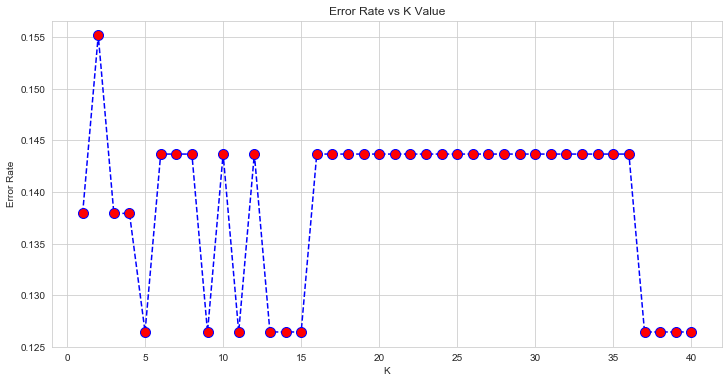

In [40]:
plt.figure(figsize=(12,6))
plt.plot(range(1,41),error_rate,color='blue',
         linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knnModel5 = KNeighborsClassifier(n_neighbors=5)
knnModel5.fit(X_train,y_train)

knn_predictTestSet_5 = knnModel5.predict(X_test)
knn_accuracy_5 = accuracy_score(y_test, knn_predictTestSet_5)
print(confusion_matrix(y_test,knn_predictTestSet_5))
print(classification_report(y_test,knn_predictTestSet_5))
print("Accuracy over the Test Set (KNN, k=1): ", knn_accuracy_5)
knn_predictTrainSet_5 = knnModel5.predict(X_train)
knn_accuracy_52 = accuracy_score(y_train,
 knn_predictTrainSet_5)
print(confusion_matrix(y_train,knn_predictTrainSet_5))
print(classification_report(y_train,knn_predictTrainSet_5))
print("Accuracy over the Train Set (KNN, k=1): ", knn_accuracy_52)

[[85  5]
 [17 67]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.89        90
           1       0.93      0.80      0.86        84

    accuracy                           0.87       174
   macro avg       0.88      0.87      0.87       174
weighted avg       0.88      0.87      0.87       174

Accuracy over the Test Set (KNN, k=1):  0.8735632183908046
[[126  11]
 [ 16 107]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       137
           1       0.91      0.87      0.89       123

    accuracy                           0.90       260
   macro avg       0.90      0.89      0.90       260
weighted avg       0.90      0.90      0.90       260

Accuracy over the Train Set (KNN, k=1):  0.8961538461538462


It would be interesting to find out if this model was overfitted or underfitted or what would be the best number of neighbors (k value) to use. We can compute and plot the training and testing accuracy scores for different k values.

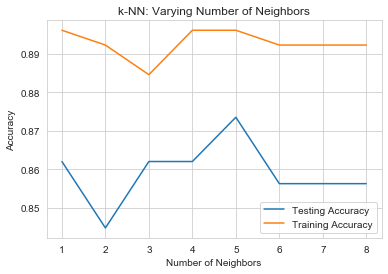

In [42]:
neighbors = np.arange(1, 9) # Try k values from 1 to 9
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()



Now that the k-NN classifier with 5 neighbors has been fit to the data, it can be used to predict the label of a new data point. However, there is no unlabeled data available, since all data was used to fit the model. Let's create a new, random unlabeled data point, and then use the current model to predict the label of it.

In [43]:
X_new = np.array([0.450377, 0.127478, 0.344668, 0.557077])
X_new = pd.DataFrame(X_new).transpose()
X_new

,0,1,2,3
0,0.450377,0.127478,0.344668,0.557077


Referring back to the feature array, this data point may imply that this vote1 bill  vote2 bill, vote3 bill, and so on. The goal is predict if this member is a republican or democrat.

In [44]:
# Predict and print the label for the new data point X_new
new_prediction = knnModel.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: [1]


IN ABOVE OUTPUT PREDICTIONS [1] MEANS IT PREDICTS THE OUTPUT TO BE DEMOCRACTIC WHICH MEANS THAT OUR MODEL IS WORKING PROPERLY

In [45]:
vote_org.loc[[429]]

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
429,WA,Jennifer Dunn,R,Y,Y,Y,N


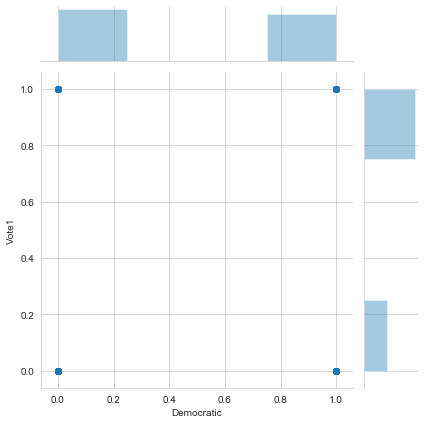

In [46]:
sns.jointplot(x='Democratic',y='Vote1',data=vote,
             kind='scatter')

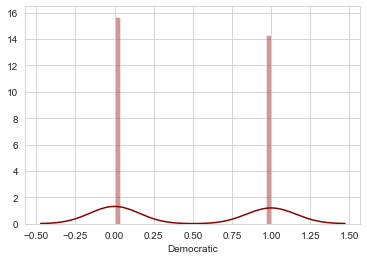

In [47]:
sns.distplot(vote['Democratic'].dropna(),kde=True,color='darkred',bins=30);

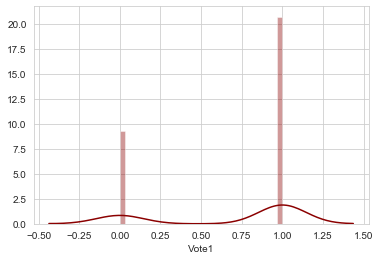

In [48]:
sns.distplot(vote['Vote1'].dropna(),kde=True,color='darkred',bins=30);

# Logistic Regression Model

Logistic regression is another technique borrowed by machine learning from the field of statistics. It is the go-to method for binary classification problems (problems with two class values). In this post you will discover the logistic regression algorithm for machine learning.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=vote.drop(['Democratic','Name','State'],axis=1)
y=vote['Democratic']
X_trainl,X_testl,y_trainl,y_testl=train_test_split(X,y,test_size=0.33,random_state=101)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel=LogisticRegression()
logmodel.fit(X_trainl,y_trainl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions_lm=logmodel.predict(X_testl)
predictions_lm1=logmodel.predict(X_trainl)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
lm_accuracy = accuracy_score(y_testl,predictions_lm)
print(confusion_matrix(y_testl,predictions_lm))
print(classification_report(y_testl,predictions_lm))
print("Accuracy over the Test Set (logistic Model:) ",lm_accuracy)

lm_accuracy2 = accuracy_score(y_trainl,predictions_lm1)
print(confusion_matrix(y_trainl,predictions_lm1))
print(classification_report(y_trainl,predictions_lm1))
print("Accuracy over the Train Set (logistic Model:) ",lm_accuracy2)

[[70  4]
 [12 58]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        74
           1       0.94      0.83      0.88        70

    accuracy                           0.89       144
   macro avg       0.89      0.89      0.89       144
weighted avg       0.89      0.89      0.89       144

Accuracy over the Test Set (logistic Model:)  0.8888888888888888
[[141  12]
 [ 21 116]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       153
           1       0.91      0.85      0.88       137

    accuracy                           0.89       290
   macro avg       0.89      0.88      0.89       290
weighted avg       0.89      0.89      0.89       290

Accuracy over the Train Set (logistic Model:)  0.8862068965517241


Text(0, 0.5, 'Predictions')

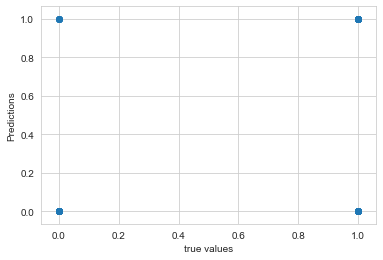

In [55]:
plt.scatter(y_testl,predictions_lm)
plt.xlabel('true values')
plt.ylabel('Predictions')

# SVM (Support Vector Machine) Model

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [56]:
from sklearn.model_selection import train_test_split
X=vote.drop(['Democratic','Name','State'],axis=1)
y=vote['Democratic']
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X,y,test_size=0.33,random_state=109)

In [57]:
from sklearn.svm import SVC

In [58]:
model_svm=SVC()

In [59]:
model_svm.fit(X_train_s,y_train_s)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
predictions_svm=model_svm.predict(X_test_s)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [62]:
print(confusion_matrix(y_test_s,predictions_svm))

[[67  5]
 [ 9 63]]


In [63]:
print(classification_report(y_test_s,predictions_svm))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        72
           1       0.93      0.88      0.90        72

    accuracy                           0.90       144
   macro avg       0.90      0.90      0.90       144
weighted avg       0.90      0.90      0.90       144



Accuracy over SVM(support Vector machine) is 90% which is good and it seems that data is enhanced which can worked over the dataset  

In [64]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

# Grid Search CV Model

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [67]:
grid.fit(X_train_s,y_train_s)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.845, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.914, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.828, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.776, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.534, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.534, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.534, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.534, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.534, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.534, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.534, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [68]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [69]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
grid_predictions=grid.predict(X_test_s)
grid_predictions1=grid.predict(X_train_s)

In [71]:
lm_accuracy_s = accuracy_score(y_test_s,grid_predictions)
print(confusion_matrix(y_test_s,grid_predictions))
print(classification_report(y_test_s,grid_predictions))
print("Accuracy over the Test Set (SVM :) ",lm_accuracy_s )

lm_accuracy_s2 = accuracy_score(y_train_s,grid_predictions1)
print(confusion_matrix(y_train_s,grid_predictions1))
print(classification_report(y_train_s,grid_predictions1))
print("Accuracy over the Train Set (SVM :) ",lm_accuracy_s2)

[[67  5]
 [10 62]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        72
           1       0.93      0.86      0.89        72

    accuracy                           0.90       144
   macro avg       0.90      0.90      0.90       144
weighted avg       0.90      0.90      0.90       144

Accuracy over the Test Set (SVM :)  0.8958333333333334
[[144  11]
 [ 23 112]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       155
           1       0.91      0.83      0.87       135

    accuracy                           0.88       290
   macro avg       0.89      0.88      0.88       290
weighted avg       0.88      0.88      0.88       290

Accuracy over the Train Set (SVM :)  0.8827586206896552


# Random Forest Model

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [72]:
from sklearn.model_selection import train_test_split
X=vote.drop(['Democratic','Name','State'],axis=1)
y=vote['Democratic']
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(X,y,test_size=0.33,random_state=119)

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_r,y_train_r)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rfc_pred=rfc.predict(X_test_r)
rfc_pred1=rfc.predict(X_train_r)

In [75]:
lm_accuracy_r = accuracy_score(y_test_r,rfc_pred)
print(confusion_matrix(y_test_r,rfc_pred))
print(classification_report(y_test_r,rfc_pred))
print("Accuracy over the Test Set (SVM :) ",lm_accuracy_r )

lm_accuracy_r2 = accuracy_score(y_train_r,rfc_pred1)
print(confusion_matrix(y_train_r,rfc_pred1))
print(classification_report(y_train_r,rfc_pred1))
print("Accuracy over the Train Set (SVM :) ",lm_accuracy_r2)

[[75  6]
 [10 53]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        81
           1       0.90      0.84      0.87        63

    accuracy                           0.89       144
   macro avg       0.89      0.88      0.89       144
weighted avg       0.89      0.89      0.89       144

Accuracy over the Test Set (SVM :)  0.8888888888888888
[[136  10]
 [ 23 121]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       146
           1       0.92      0.84      0.88       144

    accuracy                           0.89       290
   macro avg       0.89      0.89      0.89       290
weighted avg       0.89      0.89      0.89       290

Accuracy over the Train Set (SVM :)  0.8862068965517241


Accuracy over Random forest gives me 89% which is Quite good... 

# ROC MODEL

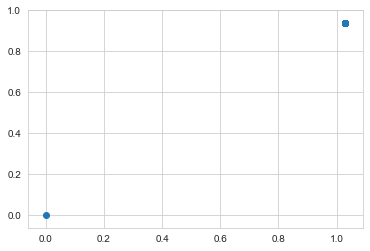

-0.48276192300325604


In [76]:
from numpy import trapz
score=np.array(vote['Vote1'])
y=np.array(vote['Democratic'])
roc_x=[]
roc_y=[]
min_score=min(score)
max_score=max(score)
thr=np.linspace(min_score,max_score,10)
FP=0
TP=0
N=sum(y)
P=len(y)-N

for(i,T) in enumerate(thr):
    for i in range(0,len(score)):
        if(score[i]>T):
            if(y[i]==1):
                TP=TP+1
            if(y[i]==0):
                FP=FP+1
    roc_x.append(FP/float(N))
    roc_y.append(FP/float(P))
    FP=0
    TP=0
plt.scatter(roc_x,roc_y)
plt.show()
auc=np.trapz(roc_x,roc_y)
print(auc)